Consider the diagram on the right, which shows an illustration of Monte Carlo integration. Given any integrable function (the line is one example) we can compute the area between f(x) and f=0 over the range x=[a,b] by filling the space with randomly drawn points over the domain x=[a,b], y=[c,d], computing the fraction of points below f(x), and then multiplying that fraction by (d-c)*(b-a).

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def function(x):
    return np.cos(x)

In [59]:
def otherFunction(x):
    return np.exp(x)

In [60]:
def boundaryFinder(func):
    y=func
    ymin=y[0]
    ymax=[-1]
    for i in range(len(y)):
        if(ymin>y[i]):
            ymin=y[i]
        elif(ymax<y[i]):
            ymax=y[i]
    return ymin,ymax

In [61]:
def xlist(a,b,n):
    return np.linspace(a,b,n)

generate random samples

In [62]:
def genRanSam(a,b,n,ymin,ymax,func):
    x=np.random.uniform(0,1.75,10000)
    y=np.random.uniform(ymin,ymax,10000)
    ir = np.where((y)<function(x))[0]
    ur = np.where((y)>=function(x))[0]
    return x,y,ir,ur

In [63]:
ymin,ymax=boundaryFinder(function(xlist(0,1.75,10000)))
x1,y1,ir1,ur1 =genRanSam(0,1.75,10000,ymin,ymax,function(x))
#x=np.random.uniform(0,1.75,10000)
#y=np.random.uniform(ymin,ymax,10000)

In [64]:
ir = np.where((y)<function(x))[0]
ur = np.where((y)>=function(x))[0]

In [65]:
def plotter(xf,x,y,ymin,ymax,func,ir,ur):
    fig = plt.figure(figsize=(7,7))
    plt.xlim([0,1.75])
    plt.ylim([ymin,ymax])
    plt.plot(x[ir],y[ir],'.',color='blue')
    plt.plot(x[ur],y[ur],'.',color="0.75")
    yc = func
    plt.plot(xf,yc,color='green')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

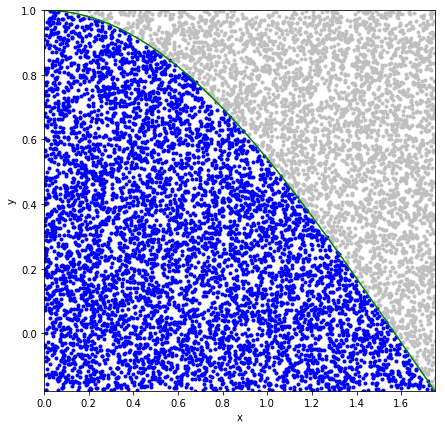

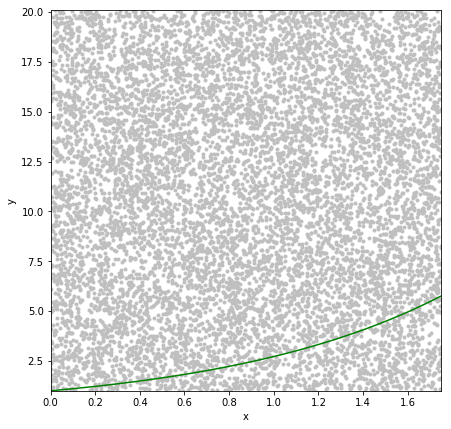

In [68]:
xf=xlist(0,1.75,10000)
plotter(xf,x1,y1,ymin,ymax,function(xf),ir1,ur1)

xf2=xlist(0,3,10000)
ymin2,ymax2=boundaryFinder(otherFunction(xf2))
x2,y2,ir2,ur2=genRanSam(0,10,10000,ymin2,ymax2,otherFunction(x))
plotter(xf2,x2,y2,ymin2,ymax2,otherFunction(xf2),ir2,ur2)



In [ ]:
fig = plt.figure(figsize=(7,7))
plt.xlim([0,1.75])
plt.ylim([ymin,ymax])
plt.plot(x[ir],y[ir],'.',color='blue')
plt.plot(x[ur],y[ur],'.',color="0.75")
theta=np.linspace(0,2*np.pi,1000)
xc = xlist(0,1.75,10000)
yc = np.cos(xc)
plt.plot(xc,yc,color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.show()